<a href="https://colab.research.google.com/github/Andreymiiranda/An-lise-de-Maturidade-de-Produtos-IoT/blob/main/Analise_Maturidade_Produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregar dataset

In [2]:
df = pd.read_csv("/content/tech_score_data.csv")

# Entendimento dos dados

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_startup                 45 non-null     int64 
 1   nome_startup               45 non-null     object
 2   setor                      45 non-null     object
 3   status                     45 non-null     object
 4   data_avaliacao             45 non-null     object
 5   1.1_precisao_basica        45 non-null     int64 
 6   1.2_calibracao             45 non-null     int64 
 7   1.3_estabilidade_leitura   45 non-null     int64 
 8   1.4_latencia_sinal         45 non-null     int64 
 9   1.5_relacao_sinal_ruido    45 non-null     int64 
 10  1.6_repetibilidade         45 non-null     int64 
 11  2.1_custo_bom              45 non-null     int64 
 12  2.2_custo_opex             45 non-null     int64 
 13  2.3_tempo_deploy           45 non-null     int64 
 14  2.4_escalabi

,id_startup,1.1_precisao_basica,1.2_calibracao,1.3_estabilidade_leitura,1.4_latencia_sinal,1.5_relacao_sinal_ruido,1.6_repetibilidade,2.1_custo_bom,2.2_custo_opex,2.3_tempo_deploy,...,7.1_perda_pacotes,7.2_latencia_nuvem,7.3_integridade_backup,7.4_resiliencia_api,7.5_seguranca_cripto,8.1_risco_supply_chain,8.2_frequencia_manutencao,8.3_indice_reparabilidade,8.4_tempo_montagem,8.5_ciclo_vida_material
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,3.355556,3.777778,3.333333,3.933333,3.866667,3.444444,3.333333,3.622222,3.044444,...,3.866667,3.444444,3.800000,3.888889,2.488889,2.533333,3.888889,3.755556,3.177778,2.511111
std,13.133926,1.246004,1.063632,1.261312,1.095445,1.324593,1.235011,1.087115,1.386442,0.796457,...,1.324593,1.178511,1.013545,1.070731,1.079188,1.035725,1.070731,0.980620,1.093137,0.968181
min,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,12.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
50%,23.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,34.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,4.000000,3.000000
max,45.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000


# Separar startups ativas e inativas

In [4]:
df_ativas = df[df["status"]=="Ativa"].copy()
df_ativas.head()

,id_startup,nome_startup,setor,status,data_avaliacao,1.1_precisao_basica,1.2_calibracao,1.3_estabilidade_leitura,1.4_latencia_sinal,1.5_relacao_sinal_ruido,...,7.1_perda_pacotes,7.2_latencia_nuvem,7.3_integridade_backup,7.4_resiliencia_api,7.5_seguranca_cripto,8.1_risco_supply_chain,8.2_frequencia_manutencao,8.3_indice_reparabilidade,8.4_tempo_montagem,8.5_ciclo_vida_material
0,1,AlphaTech,Agri-IoT,Ativa,2025-01-10,4,5,4,5,5,...,5,4,5,5,3,3,5,5,4,3
1,2,BetaSolutions,Water-Ops,Ativa,2025-01-11,3,4,3,4,4,...,4,3,4,4,2,2,4,4,3,2
3,4,DeltaDevices,Enviro-Tech,Ativa,2025-01-12,5,5,4,5,5,...,5,5,5,5,4,4,5,5,4,3
4,5,EpsilonEnergy,Power-Grid,Ativa,2025-01-08,4,4,4,5,5,...,5,4,4,5,3,3,5,4,4,3
6,7,EtaFlow,Water-Ops,Ativa,2025-01-09,3,4,3,4,5,...,5,4,4,4,2,2,4,4,3,2


# Criar coluna Score_global

In [5]:
# 1. Seleciona automaticamente todas as colunas que começam com números (as notas)
colunas_de_notas = df_ativas.filter(regex=r'^\d').columns

# 2. Calcula a média da LINHA (média de todas as provas daquela avaliação)
df_ativas["Media_da_Avaliacao"] = df_ativas[colunas_de_notas].mean(axis=1)

# 3. Calcula a média da EMPRESA (agora sim, o Score Global baseado em tudo)
df_ativas["Score_global"] = df_ativas.groupby("nome_startup")["Media_da_Avaliacao"].transform("mean")

# 4. Agora dê o print (vai aparecer com decimais)
display(df_ativas[["nome_startup", "setor", "Score_global"]].sort_values(by="Score_global", ascending=False).head())

,nome_startup,setor,Score_global
27,DaletSafe,SmartCity,4.878049
41,TsadiHydro,Water-Ops,4.780488
10,LambdaCrops,Agri-IoT,4.780488
35,LamedDrone,Agri-IoT,4.780488
16,RhoIrrigation,Water-Ops,4.780488


# Visão macro por dimensão(Grupos)

In [6]:
grupos = {
    'Performance': '1.',
    'Viabilidade': '2.',
    'Confiabilidade': '3.',
    'Usabilidade': '4.',
    'Energia': '5.',
    'Fisico': '6.',
    'Conectividade': '7.',
    'Ciclo_de_Vida': '8.'
}

Calcular média por grupo


In [7]:
colunas_notas = [col for col in df.columns if col[0].isdigit()]
for nome, prefixo in grupos.items():
    cols = [c for c in colunas_notas if c.startswith(prefixo)]
    df_ativas[nome] = df_ativas[cols].mean(axis=1)

df_ativas[list(grupos.keys())].head()

,Performance,Viabilidade,Confiabilidade,Usabilidade,Energia,Fisico,Conectividade,Ciclo_de_Vida
0,4.500000,3.666667,4.6,4.25,3.75,4.833333,4.4,4.0
1,3.500000,3.000000,3.6,3.25,2.75,4.166667,3.4,3.0
3,4.833333,4.166667,4.8,4.75,4.50,5.000000,4.8,4.2
4,4.333333,3.833333,4.4,4.25,4.50,4.833333,4.2,3.8
6,3.833333,3.166667,3.8,3.50,3.00,4.333333,3.8,3.0


# Startup com melhor Score_global

In [8]:
top_score = df_ativas.sort_values("Score_global", ascending=False).iloc[0]
top_score[['id_startup','nome_startup','Score_global']]

,27
id_startup,28
nome_startup,DaletSafe
Score_global,4.878049


# Gráfico de radar(Spider plot)



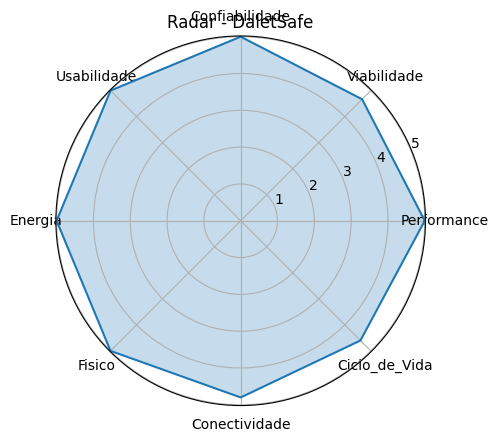

In [9]:
labels = list(grupos.keys())
values = top_score[labels].values

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

plt.figure()
ax = plt.axes(polar=True)
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
plt.title(f"Radar - {top_score['nome_startup']}")
plt.show()

# Gráfico Boxplot por setor

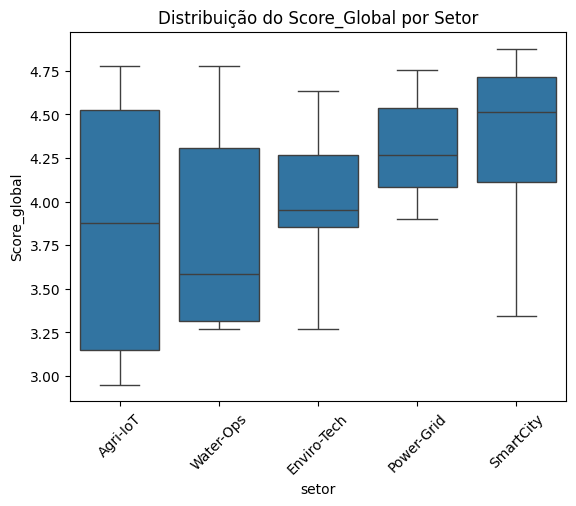

In [11]:
plt.figure()
sns.boxplot(data=df_ativas, x='setor', y='Score_global')
plt.xticks(rotation=45)
plt.title('Distribuição do Score_Global por Setor')
plt.show()

# Tomada de decisão(Insight final)

Foco: Perfomance + visibilidade

In [12]:
df_ativas['Score_Equilibrio'] = (
    df_ativas['Performance'] + df_ativas['Viabilidade']
) / 2

df_ativas.sort_values('Score_Equilibrio', ascending=False)[
    ['id_startup', 'nome_startup', 'Performance', 'Viabilidade', 'Score_Equilibrio']
].head()

,id_startup,nome_startup,Performance,Viabilidade,Score_Equilibrio
27,28,DaletSafe,5.0,4.666667,4.833333
41,42,TsadiHydro,5.0,4.333333,4.666667
10,11,LambdaCrops,5.0,4.333333,4.666667
35,36,LamedDrone,5.0,4.333333,4.666667
16,17,RhoIrrigation,5.0,4.333333,4.666667


Recomendação:
A startup com maior Score_Equilibrio apresenta o melhor balanço entre excelência técnica e viabilidade econômica, reduzindo riscos operacionais e financeiros.